In [1]:
%matplotlib inline
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import brewer2mpl

In [2]:
def exp_smooth(tab, alpha):
    smooth = [tab[0]]
    for i in range(len(tab)-1):
        smooth.append(alpha*tab[1+i]+(1-alpha)*smooth[i])
    return smooth

In [22]:
LOGDIR = '../results/'
PARAMS = ['_delta_None_goal_False_hindsight_False_reset_True_',
          '_delta_None_goal_True_hindsight_False_reset_True']
param_eval = {}

In [25]:
for param in PARAMS:
    res_files = glob.glob(LOGDIR+param+'/2017*/'+'progress.json')
    sum_eval_rewards  = [0]*50
    episodes = range(10,500,10)
    for filename in res_files:
        with open(filename, 'r') as json_data:
            lines = json_data.readlines()
            eval_rewards  = []
            for line in lines:
                episode_data = json.loads(line)
                if 'Eval_reward' in episode_data:
                    eval_rewards.append(episode_data['Eval_reward'])
            sum_eval_rewards = [x+y for x,y in zip(sum_eval_rewards, eval_rewards)]
    mean_eval_rewards = [x/len(res_files) for x in sum_eval_rewards]
    param_eval[param] = mean_eval_rewards

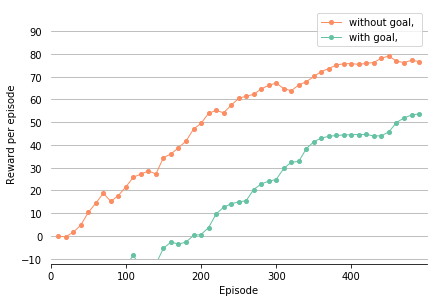

In [24]:
# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)
colors = bmap.mpl_colors
fig = plt.figure()
fig.subplots_adjust(left=0.12, bottom=0.12, right=0.99, top=0.99, wspace=0.1)
ax1 = fig.add_subplot(111)

ax1.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', direction='out')
ax1.tick_params(axis='y', length=0)
for spine in ax1.spines.values():
    spine.set_position(('outward', 5))
ax1.set_xlim(0, 500)
ax1.set_ylim(-10, 100)
ax1.set_yticks(np.arange(-10, 100, 10))
ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward per episode")
ax1.set_xticks(np.arange(0, 500, 100))

for key,val in param_eval.items():
    params_names = key.split('_')[1::2]
    params_val = key.split('_')[2::2]
    params_dict = dict(zip(params_names,params_val))
    l = 'solid'
    marker = 'o'
    label = ''
    if params_dict['goal']=='True':
        c = colors[0]
        label += 'with goal, '
    if params_dict['goal']=='False':
        c = colors[1]
        label += 'without goal, '
    if params_dict['delta']=='1':
        l='dashed'
        label += 'clipping 1, '
    if params_dict['reset']=='False':
        marker='*'
        label += 'no reset, '
    x = range(10,500,10)
    ax1.plot(x, exp_smooth(val,0.5), linewidth=1, color=c, linestyle=l, marker=marker, markersize=4, label=label)
legend = ax1.legend(loc=0)